WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, nu - 2.5, Group 1 log sigma, Group 2 log sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


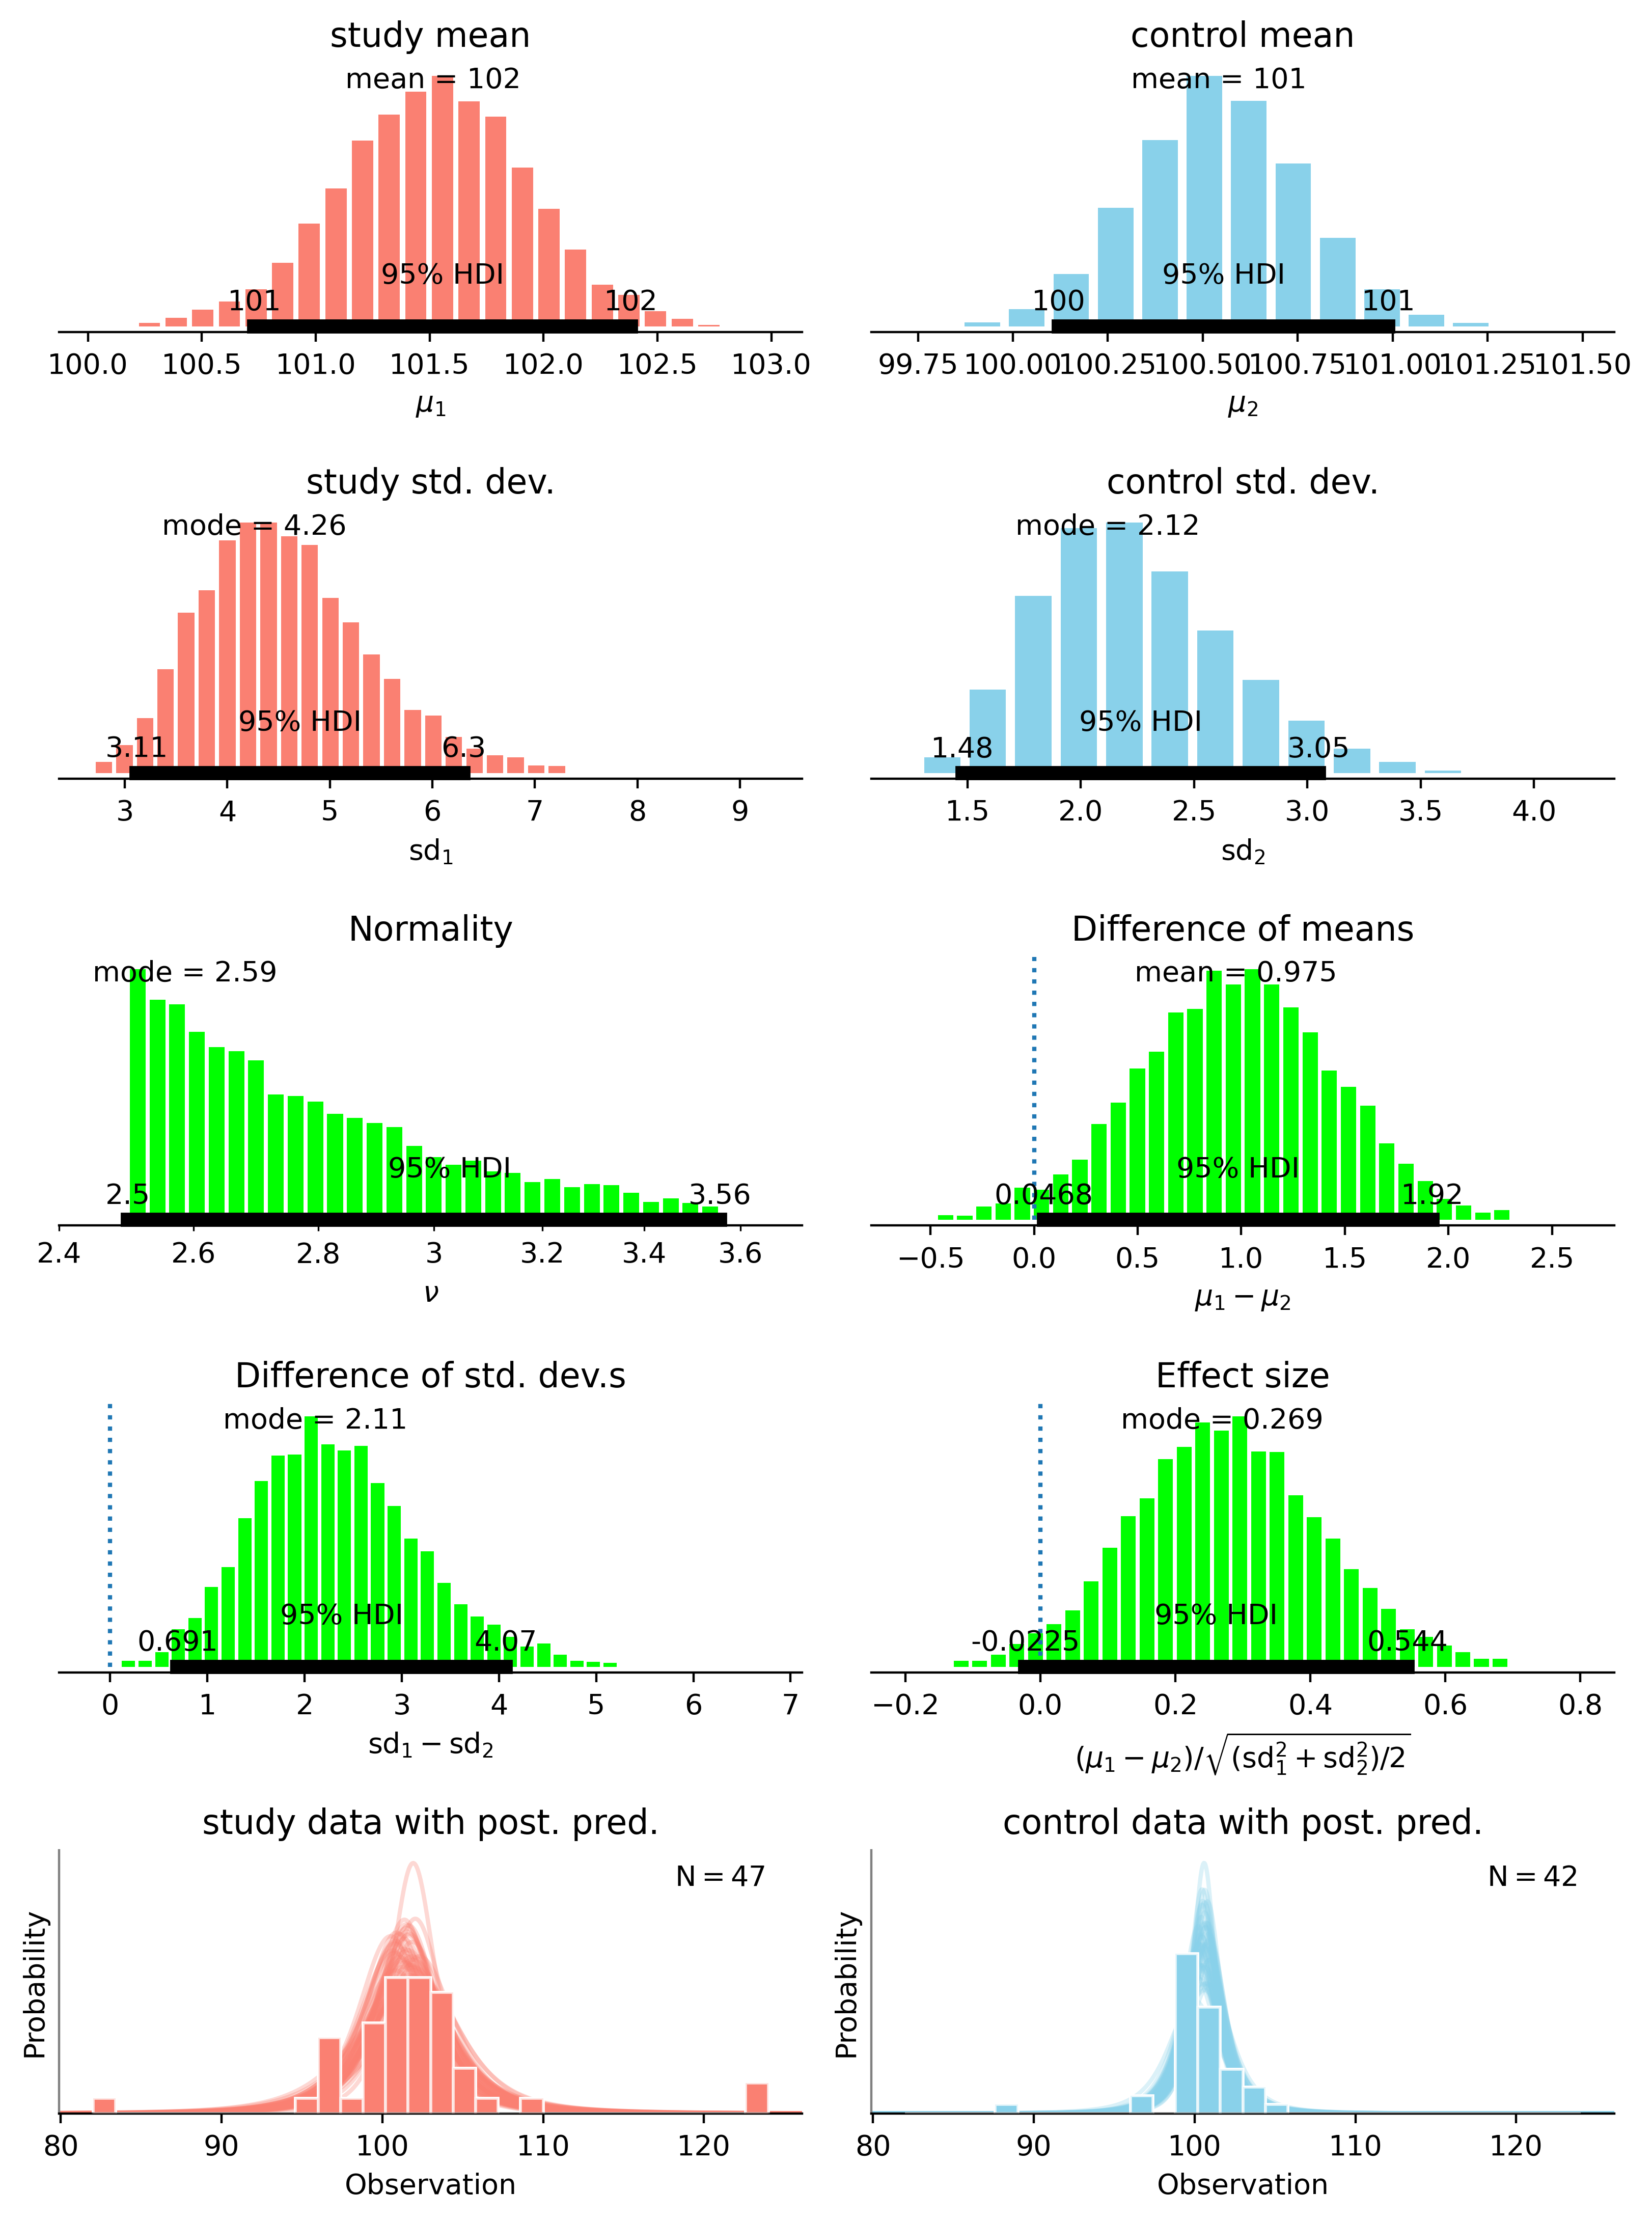

In [1]:
from bayes_test import BayesianHypothesisTest
import pandas as pd

draws = 2000

study = [101, 100, 102, 104, 102, 97, 105, 105, 98, 101, 100, 123, 105, 103,
         100, 95, 102, 106, 109, 102, 82, 102, 100, 102, 102, 101, 102, 102,
         103, 103, 97, 97, 103, 101, 97, 104, 96, 103, 124, 101, 101, 100,
         101, 101, 104, 100, 101]

# IQ scores of those who took a placebo pill
control = [99, 101, 100, 101, 102, 100, 97, 101, 104, 101, 102, 102, 100, 105,
           88, 101, 100, 104, 100, 100, 100, 101, 102, 103, 97, 101, 101, 100,
           101, 99, 101, 100, 100, 101, 100, 99, 101, 100, 102, 99, 100, 99]

df1 = pd.DataFrame({'IQ' : control})
df2 = pd.DataFrame({'IQ' : study})
df1['group'] = 'control'
df2['group'] = 'study'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTest(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
study_test.value_storage

{'Group 1 mean': {'mean': 101.51576374680673,
  'hdi_min': 100.73074371460412,
  'hdi_max': 102.38352203298334},
 'Group 2 mean': {'mean': 100.54250376202818,
  'hdi_min': 100.12102737417601,
  'hdi_max': 100.98874519480557},
 'Group 1 SD': {'mode': 4.260916955207092,
  'hdi_min': 3.113422521380944,
  'hdi_max': 6.301546565899135},
 'Group 2 SD': {'mode': 2.1202938994613936,
  'hdi_min': 1.4782602692635125,
  'hdi_max': 3.0508244024468416},
 'Normality': {'mode': 2.5866258789873715,
  'hdi_min': 2.5000023237103512,
  'hdi_max': 3.5569843581329934},
 'Difference of means': {'mean': 0.9750421625062012,
  'hdi_min': 0.046776827397849274,
  'hdi_max': 1.9234428335567912},
 'Difference of SDs': {'mode': 2.1121585083147165,
  'hdi_min': 0.6912177773516865,
  'hdi_max': 4.069209282323197},
 'Effect size': {'mode': 0.26920013314989605,
  'hdi_min': -0.02253214209928114,
  'hdi_max': 0.5437887823656228}}